In [109]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
import minisom
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from random import randint, choice
import LVQ

In [110]:
data = pd.read_csv(r"../data/SD-2X_rocktype.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y[y==4] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=44)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [111]:
# Training the SOM
from minisom import MiniSom
som1 = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som1.random_weights_init(x_train)
som1.train_random(data = x_train, num_iteration = 100)

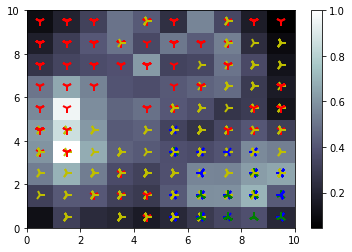

In [112]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som1.distance_map().T)
colorbar()
markers = ['1', '2', '3', '4', 's', '8', 'p', '>']
colors = ['r', 'g', 'b', 'y', 'w', 'c', 'm', 'k']
for i, x in enumerate(x_train):
    w = som1.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[0, w[0], w[1]] += 1
    elif y_train[i] == 1:
        labels[1, w[0], w[1]] += 1
    elif y_train[i] == 2:
        labels[2, w[0], w[1]] += 1
    elif y_train[i] == 3:
        labels[3, w[0], w[1]] += 1
show()

In [113]:
taggings = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        tmp = np.array([labels[0][i][j], labels[1][i][j], labels[2][i][j], labels[3][i][j]])
        sort = tmp.argsort()
#         if (sort[3]/sort[2] < 20):
#             taggings[i][j] = np.random.choice([sort[3], sort[2]])
#         else:
        taggings[i][j] = sort[3]

In [114]:
p_vectors = []
for i in range(10):
    for j in range(10):
        if(taggings[i][j] == 0):
            p = LVQ.prototype(0, som1.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 1):
            p = LVQ.prototype(1, som1.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 2):
            p = LVQ.prototype(2, som1.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 3):
            p = LVQ.prototype(3, som1.weights[(i,j)], epsilon)
            p_vectors.append(p)
print("class id \t Initial prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Initial prototype vector 

0 	 [0.32371916 0.55982026 0.26813866 0.51498421 0.30290314 0.39108797]
0 	 [0.33891199 0.49829473 0.32102437 0.51966122 0.34875943 0.37696613]
3 	 [0.34303477 0.39800237 0.51955212 0.47652934 0.3526597  0.3202152 ]
0 	 [0.17844363 0.24602135 0.83706817 0.3013808  0.18156753 0.28835932]
0 	 [0.08329561 0.09778717 0.95195302 0.16574077 0.08570637 0.20608098]
0 	 [0.16247953 0.17626213 0.88693354 0.27034345 0.19746512 0.20929142]
0 	 [0.33476722 0.32637715 0.64564572 0.43516003 0.38521775 0.16368722]
0 	 [0.41279526 0.40182135 0.46961678 0.49603589 0.41880534 0.16171035]
0 	 [0.42210822 0.38800447 0.44128501 0.48794601 0.47571148 0.1102361 ]
0 	 [0.39339039 0.3699486  0.49025275 0.45420083 0.49819766 0.11633992]
0 	 [0.28681604 0.61557038 0.23319891 0.48741224 0.26381822 0.42101923]
3 	 [0.3311651  0.54071241 0.33685202 0.49366693 0.33734333 0.35634663]
0 	 [0.34263453 0.42058616 0.49410971 0.48922795 0.34243814 0.32397005]
3 	 [0.23773032 0.28339548

In [115]:
lvq1 = LVQ.LVQ(x_train, y_train, n_classes=2, n_neurons=25, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq1.fit(x_train, y_train)

In [116]:
predicted_y1 = [lvq1.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.99      0.96      0.97       138
          1       0.98      0.85      0.91        55
          2       0.65      0.39      0.49        28
          3       0.82      0.98      0.89       108

avg / total       0.90      0.90      0.90       329



In [117]:
data_new = pd.read_csv(r"../data/SD-3X_rocktype.csv")
x_new = data.iloc[:, 0:6].values
y_new = data.iloc[:, 6].values
y_new[y_new == 4] = 0
x_new = minmax.fit_transform(x_new)
predicted_y_new = [lvq1.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new, target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       0.96      0.90      0.93       558
          1       0.83      0.93      0.87       165
          2       0.59      0.32      0.41       139
          3       0.78      0.91      0.84       453

avg / total       0.84      0.85      0.84      1315



In [118]:
arr = np.array([1,2,3,0])

arr.argsort()

array([3, 0, 1, 2], dtype=int64)

In [119]:
# Training the SOM
from minisom import MiniSom
som2 = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som2.random_weights_init(x_train)
som2.train_random(data = x_train, num_iteration = 100)

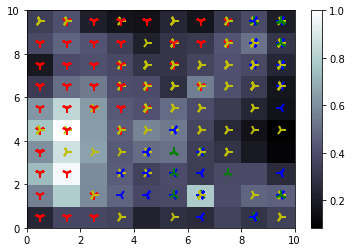

In [120]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som2.distance_map().T)
colorbar()
markers = ['1', '2', '3', '4', 's', '8', 'p', '>']
colors = ['r', 'g', 'b', 'y', 'w', 'c', 'm', 'k']
for i, x in enumerate(x_train):
    w = som2.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[0, w[0], w[1]] += 1
    elif y_train[i] == 1:
        labels[1, w[0], w[1]] += 1
    elif y_train[i] == 2:
        labels[2, w[0], w[1]] += 1
    elif y_train[i] == 3:
        labels[3, w[0], w[1]] += 1
show()

In [121]:
taggings = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        tmp = np.array([labels[0][i][j], labels[1][i][j], labels[2][i][j], labels[3][i][j]])
        sort = tmp.argsort()
#         if (sort[3]/sort[2] < 20):
#             taggings[i][j] = np.random.choice([sort[3], sort[2]])
#         else:
        taggings[i][j] = sort[3]

In [122]:
p_vectors = []
for i in range(10):
    for j in range(10):
        if(taggings[i][j] == 0):
            p = LVQ.prototype(0, som2.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 1):
            p = LVQ.prototype(1, som2.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 2):
            p = LVQ.prototype(2, som2.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 3):
            p = LVQ.prototype(3, som2.weights[(i,j)], epsilon)
            p_vectors.append(p)
print("class id \t Initial prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Initial prototype vector 

0 	 [0.40007671 0.25899226 0.62016644 0.27140058 0.56066201 0.01597057]
0 	 [0.37592783 0.28537925 0.63243084 0.30992886 0.52649992 0.06332551]
0 	 [0.15312849 0.16138978 0.91140804 0.19464371 0.17777804 0.22438626]
0 	 [0.06145879 0.09473552 0.94099726 0.16826101 0.08023312 0.25888806]
0 	 [0.09348097 0.12886398 0.9036712  0.24361297 0.11577485 0.29203194]
0 	 [0.33563398 0.34567261 0.60794252 0.45803589 0.37678568 0.21564288]
0 	 [0.42259897 0.36510452 0.51183477 0.43630722 0.48266445 0.05296228]
0 	 [0.41441259 0.36740071 0.44750169 0.46754696 0.51808381 0.07752531]
0 	 [0.39016059 0.43157986 0.39082505 0.50540204 0.46853165 0.18389179]
0 	 [0.3273265  0.52416002 0.27602666 0.54011559 0.34253401 0.36451134]
0 	 [0.41155592 0.32302997 0.62288984 0.32644656 0.47452056 0.08089805]
3 	 [0.36789555 0.31782846 0.62550808 0.39591548 0.38384083 0.26133259]
0 	 [0.30769416 0.23401432 0.7736431  0.32446495 0.323864   0.20462788]
3 	 [0.19625998 0.20943515

In [123]:
lvq2 = LVQ.LVQ(x_train, y_train, n_classes=2, n_neurons=25, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq2.fit(x_train, y_train)

In [124]:
predicted_y2 = [lvq2.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y2, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96       138
          1       0.91      0.91      0.91        55
          2       0.25      0.04      0.06        28
          3       0.77      0.91      0.83       108

avg / total       0.82      0.86      0.83       329



In [125]:
# Training the SOM
from minisom import MiniSom
som3 = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som3.random_weights_init(x_train)
som3.train_random(data = x_train, num_iteration = 100)

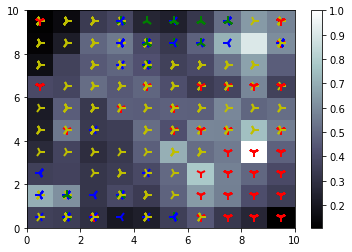

In [126]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som3.distance_map().T)
colorbar()
markers = ['1', '2', '3', '4', 's', '8', 'p', '>']
colors = ['r', 'g', 'b', 'y', 'w', 'c', 'm', 'k']
for i, x in enumerate(x_train):
    w = som3.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[0, w[0], w[1]] += 1
    elif y_train[i] == 1:
        labels[1, w[0], w[1]] += 1
    elif y_train[i] == 2:
        labels[2, w[0], w[1]] += 1
    elif y_train[i] == 3:
        labels[3, w[0], w[1]] += 1
show()

In [127]:
taggings = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        tmp = np.array([labels[0][i][j], labels[1][i][j], labels[2][i][j], labels[3][i][j]])
        sort = tmp.argsort()
#         if (sort[3]/sort[2] < 20):
#             taggings[i][j] = np.random.choice([sort[3], sort[2]])
#         else:
        taggings[i][j] = sort[3]

In [128]:
p_vectors = []
for i in range(10):
    for j in range(10):
        if(taggings[i][j] == 0):
            p = LVQ.prototype(0, som3.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 1):
            p = LVQ.prototype(1, som3.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 2):
            p = LVQ.prototype(2, som3.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 3):
            p = LVQ.prototype(3, som3.weights[(i,j)], epsilon)
            p_vectors.append(p)
print("class id \t Initial prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Initial prototype vector 

0 	 [0.38381934 0.4215514  0.41385629 0.56518406 0.23041156 0.36218447]
0 	 [0.28711119 0.34268584 0.15928335 0.53008349 0.216219   0.66859797]
0 	 [0.35958023 0.36353975 0.37051699 0.56725554 0.22943513 0.47627591]
0 	 [0.31245771 0.43574672 0.29403683 0.59192077 0.26609821 0.45261337]
0 	 [0.37426831 0.43072115 0.32279725 0.58342655 0.31320736 0.36293122]
0 	 [0.37205279 0.40833162 0.37367422 0.56364189 0.37585624 0.31024102]
0 	 [0.39987744 0.37904391 0.39905068 0.53750285 0.45873431 0.19451433]
0 	 [0.36928154 0.41189062 0.40689418 0.55971656 0.36419458 0.28721781]
0 	 [0.36380042 0.45173759 0.36351996 0.57431151 0.34323311 0.28947015]
0 	 [0.39119406 0.45350279 0.38987167 0.55765293 0.36482333 0.21267265]
0 	 [0.34817198 0.46504755 0.3027435  0.59650524 0.2194302  0.40851598]
3 	 [0.31130817 0.39579901 0.25322318 0.61637198 0.18534815 0.51772583]
0 	 [0.32924814 0.42563543 0.28562488 0.58360905 0.28316505 0.45614318]
3 	 [0.35822309 0.42852167

In [129]:
lvq3 = LVQ.LVQ(x_train, y_train, n_classes=2, n_neurons=25, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq3.fit(x_train, y_train)

In [130]:
predicted_y3 = [lvq3.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y3, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.98      0.88      0.93       138
          1       0.95      0.76      0.85        55
          2       0.45      0.18      0.26        28
          3       0.67      0.94      0.78       108

avg / total       0.83      0.82      0.81       329



In [131]:
ensemble = [np.asarray(predicted_y1), np.asarray(predicted_y2), np.asarray(predicted_y3)]

In [132]:
len(ensemble)

3

In [133]:
predict = [np.bincount([ensemble[j][i] for j in range(3)]).argmax() for i in range(len(ensemble[1]))]

In [134]:
print (classification_report(y_test, predict, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.98      0.97      0.97       138
          1       0.94      0.87      0.91        55
          2       0.80      0.14      0.24        28
          3       0.79      0.99      0.88       108

avg / total       0.89      0.89      0.87       329

